In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
stocks = input("Enter code of the stocks :-")
data = yf.download(stocks,"2008-01-01","2021-01-18",auto_adjust=True)
data.head()


Enter code of the stocks :-NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [7]:
data.shape

(3282, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [9]:
data.describe()`

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


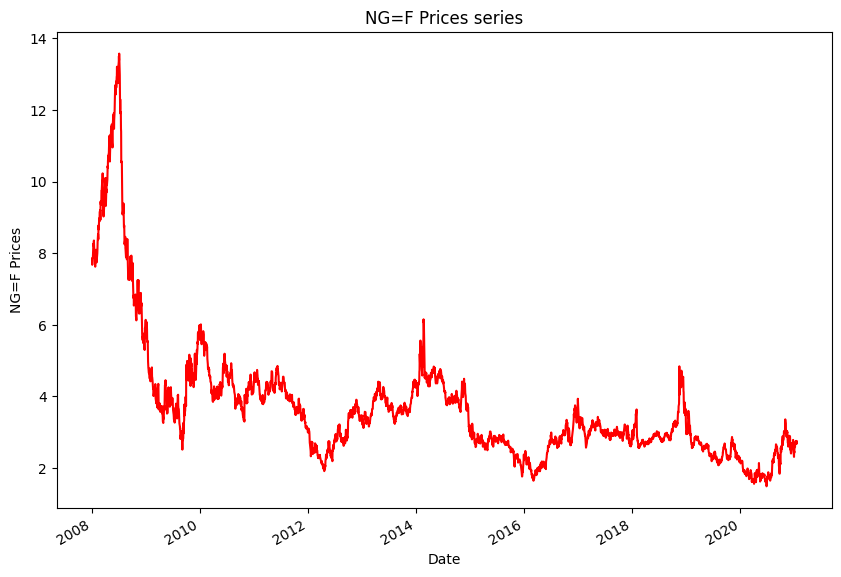

In [14]:
data.Close.plot(figsize=(10,7),color= 'r') 
plt.ylabel("{} Prices".format(stocks)) 
plt.title("{} Prices series".format(stocks)) 
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_12404\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<AxesSubplot: xlabel='Close', ylabel='Density'>

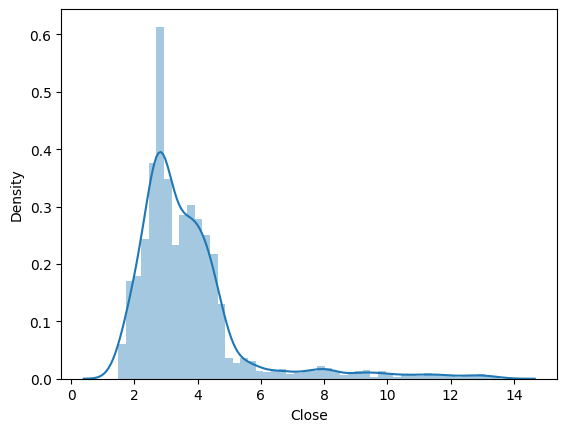

In [16]:
sns.distplot(data["Close"])

C:\Users\aksha\AppData\Local\Temp\ipykernel_12404\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

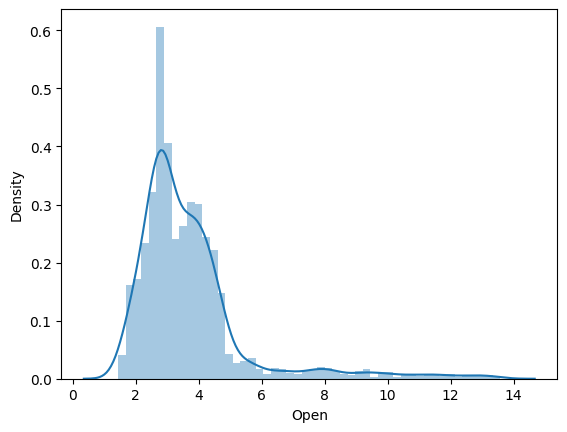

In [19]:
sns.distplot(data["Open"])

In [22]:
#conclusion

#  - shape of the data
#  - how our data is distrubeted
#  - it very very non linear


x = data.drop("Close",axis =1)
y = data["Close"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2625, 4)
(657, 4)
(2625,)
(657,)


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred1 = lr.predict(x_test) 

In [26]:
pred1


array([ 2.80025521,  5.71452107,  2.67598004,  5.96209712,  2.11272627,
       12.78073553,  3.96962911,  4.87093937,  1.7957296 ,  4.77535218,
        2.88317702,  3.52438236,  2.78074708,  2.97823651,  4.2320276 ,
        2.46605691,  4.14343586,  4.57617542,  9.00290889,  2.93461728,
        4.41981471,  2.6638892 ,  2.54609005,  2.35659708,  2.85304719,
        1.96549634,  2.77466247,  3.91456824,  3.30051883,  4.7520832 ,
        4.02003703,  2.7084426 , 11.73817085,  4.23592618,  4.39406688,
        3.68320373,  3.52338075,  5.32779806,  3.6551215 ,  3.42242166,
        3.96382871,  2.42903792,  2.68051977,  2.61045398,  3.13018683,
        4.4270207 ,  4.27296423,  2.75934544,  3.85466274,  1.99377504,
        4.10987778,  2.45974884,  2.27348621,  3.96081824,  1.9306302 ,
        3.23567102,  3.76555422,  4.96458716,  4.33327308,  3.4028305 ,
        2.71162414,  3.90478554,  4.75601461,  3.15688221,  2.4433227 ,
        2.55267657,  4.36853634,  3.90557551,  2.4086365 ,  2.85

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

def calculate_metrics(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scor = r2_score(y_test, y_pred)
    
    print("mse -> ",mse)
    print("rmse -> ",rmse)
    print("r2_scor ->",r2_scor)

calculate_metrics(y_test, pred1)

mse ->  0.0015345662928876315
rmse ->  0.03917354072441795
r2_scor -> 0.9994383299702705


In [32]:
from sklearn.linear_model import Lasso,Ridge

la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)

la_p = la.predict(x_test)
ri_p = ri.predict(x_test)


In [33]:
calculate_metrics(y_test,la_p)

mse ->  0.2369233626053286
rmse ->  0.48674774021594447
r2_scor -> 0.9132831519010187


In [34]:
calculate_metrics(y_test,ri_p)

mse ->  0.0016151026199614476
rmse ->  0.040188339353118926
r2_scor -> 0.9994088526896658


In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr= SVR()

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid = GridSearchCV(SVR(),param_grid,refit = True,verbose = 3)
grid.fit(x_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.4s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.006 total time=   0.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.4s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.012 total time=   0.4s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.4s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.008 total time=   0.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
svr = SVR(C=10,gamma = 1,kernel = "rbf")
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

In [40]:
import joblib 

joblib.dump(ri,'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")